## Problem definition
How do economical factors influence health across countries?

## Data acquisition
- Economic factors data: agriculture_gdp_pct, industry_gdp_pct, services_gdp_pct
- Demographic factors data: under_five_mortality_rate
- Direct factors data: carbon_dioxide_emissions_per_capita
- Indirect factors data: coal_consumption_per_capita, electricity_consumption_per_capita, urban_population_pct
- Source: Gapminder

## Data selection motivation
- agriculture, industry and services coresponds to the three main economic sectors
- children mortatlity is a key demographic indicator and an important measurer of health state on the entire population 


## Imports

In [107]:
%matplotlib inline

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read, tidy and clean data

In [240]:
# change country column name
def rename_country_column(dataframe):
    dataframe.columns.values[0] = "country"
    
    return dataframe

In [238]:
# convert year to numeric type
def convert_year_column(dataframe):
    dataframe['year'] = dataframe['year'].astype(int)
    
    return dataframe

In [111]:
# melt dataframe to the desired columns
def melt_data(dataframe, column_name):
    dataframe = pd.melt(dataframe,
        id_vars = ["country"],
        var_name = "year",
        value_name = column_name)
                        
    return dataframe

In [232]:
# merge multiple df on specified keys
def merge_datasets(dataframes):
    merge_keys = ['country', 'year']
    
    # first element is the left df
    merged = dataframes[0].copy()
    
    # the rest are the right df
    dataframes.pop(0)
    
    for df in dataframes:
        merged = merged.merge(df, on = merge_keys, sort = True)
    
    return merged

In [72]:
# remove rows where all features are not presented, reset index
def drop_na(dataframe, columns):
    #columns = ['agriculture', 'industry', 'services']
    dataframe.dropna(subset = columns, how = 'all', inplace = True)
    dataframe.reset_index(drop = True, inplace = True)
    
    return dataframe

 - ### Process agriculture_gdp_pct (% of GDP)

In [291]:
agro_data = pd.read_excel("data/agriculture_gdp_pct.xlsx")
agro_data.head()

,"Agriculture, value added (% of GDP)",1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.158479,46.013843,41.594103,39.480416,32.589058,34.494833,28.134488,31.177550,29.915323,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.311622,23.996207,23.499999,22.800000,22.000000,21.117256,20.304655,20.401935,20.160029,20.04532
4,Algeria,NaN,NaN,NaN,NaN,12.876213,9.137256,10.330666,10.853374,9.030165,...,10.003598,10.491237,10.188493,8.221657,7.988789,8.025346,6.920100,6.915571,6.915571,NaN


In [292]:
agro_data = rename_country_column(agro_data)
agro_data = melt_data(agro_data, "agriculture")
agro_data = convert_year_column(agro_data)
agro_data.head()

,country,year,agriculture
0,Abkhazia,1961,NaN
1,Afghanistan,1961,NaN
2,Akrotiri and Dhekelia,1961,NaN
3,Albania,1961,NaN
4,Algeria,1961,NaN


- ### Process industry_gdp_pct (% of GDP)

In [293]:
industry_data = pd.read_excel("data/industry_gdp_pct.xlsx")
industry_data.head()

,"Industry, value added (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.722679,18.650846,23.358852,25.275687,28.204721,25.818468,25.978376,21.214793,22.167053,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.517023,21.085911,21.199999,21.500000,20.298799,19.664773,19.086442,19.358809,19.309736,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,37.72878,41.105581,42.385889,42.263761,...,53.088639,54.817740,56.354391,61.310433,62.297104,61.283007,62.118578,62.123462,62.123462,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
industry_data = rename_country_column(industry_data)
industry_data = melt_data(industry_data, "industry")
industry_data = convert_year_column(industry_data)
industry_data.head()

,country,year,industry
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


- ### Process services_gdp_pct (% of GDP)

In [297]:
services_data = pd.read_excel("data/services_gdp_pct.xlsx")
services_data.head()

,"Services, etc., value added (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.118842,35.335311,35.047044,35.243897,39.206221,39.686699,45.887136,47.607657,47.917623,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.171355,54.917882,55.300002,55.700000,57.701201,59.217972,60.608903,60.239255,60.530235,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,49.395007,49.757166,47.28345,46.882862,...,36.907758,34.691024,33.457119,30.467911,29.714108,30.691648,30.961322,30.960967,30.960967,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
services_data = rename_country_column(services_data)
services_data = melt_data(services_data, "services")
services_data = convert_year_column(services_data)
services_data.head()

,country,year,services
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


In [118]:
agro_data.info(); industry_data.info(); services_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13770 entries, 0 to 13769
Data columns (total 3 columns):
country        13770 non-null object
year           13770 non-null object
agriculture    6361 non-null float64
dtypes: float64(1), object(2)
memory usage: 322.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 3 columns):
country     11076 non-null object
year        11076 non-null object
industry    6349 non-null float64
dtypes: float64(1), object(2)
memory usage: 259.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 3 columns):
country     11076 non-null object
year        11076 non-null object
services    6311 non-null float64
dtypes: float64(1), object(2)
memory usage: 259.7+ KB


In [248]:
# combine dataframes related to economics into one
economy_data = merge_datasets([agro_data, industry_data, services_data])
economy_data.shape

(10251, 5)

In [120]:
economy_data

,country,year,agriculture,industry,services
0,Afghanistan,1961,NaN,NaN,NaN
1,Afghanistan,1962,NaN,NaN,NaN
2,Afghanistan,1963,NaN,NaN,NaN
3,Afghanistan,1964,NaN,NaN,NaN
4,Afghanistan,1965,NaN,NaN,NaN
5,Afghanistan,1966,NaN,NaN,NaN
6,Afghanistan,1967,NaN,NaN,NaN
7,Afghanistan,1968,NaN,NaN,NaN
8,Afghanistan,1969,NaN,NaN,NaN
9,Afghanistan,1970,NaN,NaN,NaN


In [121]:
economy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10251 entries, 0 to 10250
Data columns (total 5 columns):
country        10251 non-null object
year           10251 non-null object
agriculture    6055 non-null float64
industry       5993 non-null float64
services       5955 non-null float64
dtypes: float64(3), object(2)
memory usage: 480.5+ KB


In [249]:
# remove rows where all of the three features are not presented
economy_data = drop_na(economy_data, columns = ['agriculture', 'industry', 'services'])
economy_data.shape

(6169, 5)

In [124]:
economy_data.head(10)

,country,year,agriculture,industry,services
0,Afghanistan,2002,45.158479,19.722679,35.118842
1,Afghanistan,2003,46.013843,18.650846,35.335311
2,Afghanistan,2004,41.594103,23.358852,35.047044
3,Afghanistan,2005,39.480416,25.275687,35.243897
4,Afghanistan,2006,32.589058,28.204721,39.206221
5,Afghanistan,2007,34.494833,25.818468,39.686699
6,Afghanistan,2008,28.134488,25.978376,45.887136
7,Afghanistan,2009,31.177550,21.214793,47.607657
8,Afghanistan,2010,29.915323,22.167053,47.917623
9,Albania,1980,33.600206,44.999999,21.399794


In [250]:
# count the rest NaNs in df
economy_data.isnull().sum()

country          0
year             0
agriculture    114
industry       176
services       214
dtype: int64

In [251]:
# fill NaN values with the mean value of each column
economy_data.agriculture.fillna(economy_data.agriculture.dropna().mean(), inplace = True)
economy_data.industry.fillna(economy_data.industry.dropna().mean(), inplace = True)
economy_data.services.fillna(economy_data.services.dropna().mean(), inplace = True)

economy_data.shape

(6169, 5)

In [127]:
economy_data.year.nunique()

51

In [79]:
economy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 5 columns):
country        6169 non-null object
year           6169 non-null object
agriculture    6055 non-null float64
industry       5993 non-null float64
services       5955 non-null float64
dtypes: float64(3), object(2)
memory usage: 241.1+ KB


- ### Process carbon_dioxide_emissions_per_capita (metric tons of CO2 per capita)

In [252]:
carbon_data = pd.read_excel("data/carbon_dioxide_emissions_per_capita.xlsx")
carbon_data.head()

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [253]:
carbon_data = rename_country_column(carbon_data)
carbon_data = melt_data(carbon_data, "carbon_dioxide")
carbon_data = convert_year_column(carbon_data)
carbon_data.head()

,country,year,carbon_dioxide
0,Abkhazia,1751,NaN
1,Afghanistan,1751,NaN
2,Akrotiri and Dhekelia,1751,NaN
3,Albania,1751,NaN
4,Algeria,1751,NaN


In [130]:
carbon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59455 entries, 0 to 59454
Data columns (total 3 columns):
country           59455 non-null object
year              59455 non-null object
carbon_dioxide    15072 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [254]:
carbon_data = drop_na(carbon_data, columns = ['carbon_dioxide'])
carbon_data.shape

(15072, 3)

In [135]:
carbon_data.sort_values(by = ['country', 'year'], inplace = True)

In [137]:
carbon_data.head(10)

,country,year,carbon_dioxide
4467,Afghanistan,1949,0.001816
4546,Afghanistan,1950,0.010346
4673,Afghanistan,1951,0.011075
4802,Afghanistan,1952,0.010903
4932,Afghanistan,1953,0.012447
5062,Afghanistan,1954,0.012244
5193,Afghanistan,1955,0.017436
5327,Afghanistan,1956,0.020401
5462,Afghanistan,1957,0.032068
5599,Afghanistan,1958,0.035427


In [138]:
carbon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15072 entries, 4467 to 14941
Data columns (total 3 columns):
country           15072 non-null object
year              15072 non-null object
carbon_dioxide    15072 non-null float64
dtypes: float64(1), object(2)
memory usage: 471.0+ KB


In [374]:
groups = economy_data.groupby('year')['agriculture'].mean(), economy_data.groupby('year')['industry'].mean(), economy_data.groupby('year')['services'].mean()

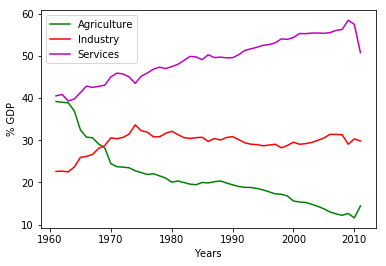

In [375]:
plt.plot(groups[0].index, groups[0].values, color = 'g', label = "Agriculture")
plt.plot(groups[1].index, groups[1].values, color = 'r', label = "Industry")
plt.plot(groups[2].index, groups[2].values, color = 'm', label = "Services")

plt.xlabel('Years')
plt.ylabel('% GDP')
plt.legend()
plt.show()

In [360]:
economy_data.agriculture.mean()

19.090602250584467

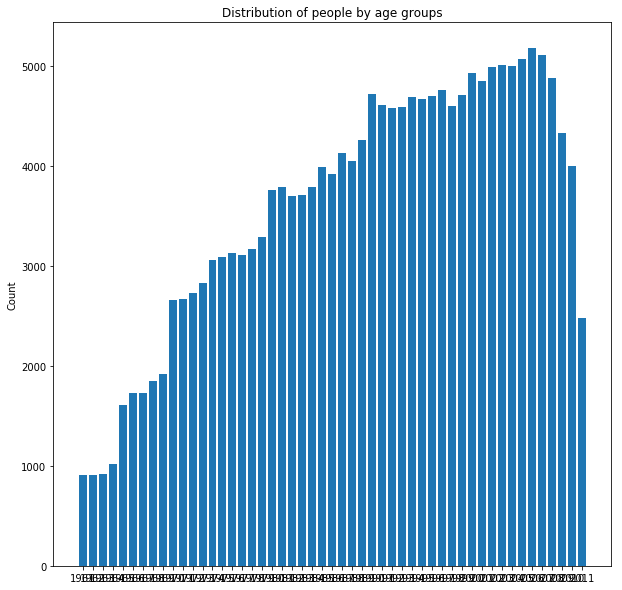

In [341]:
plt.figure(figsize = (10, 10))
plt.title("Distribution of people by age groups")

plt.bar(range(len(grouped.values)), grouped.values)
plt.xticks(range(len(grouped.index)), grouped.index)
plt.ylabel("Count")
plt.show()

- ### Process coal_consumption_per_capita (tonnes oil equivalent per capita)

In [256]:
coal_data = pd.read_excel("data/coal_consumption_per_capita.xlsx")
coal_data.head()

,Coal Consumption per person (tonnes oil equivalent),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,0.005871,0.00556,0.004136,0.004249,0.005248,0.006038,0.002118,0.002055,0.001993,...,0.019019,0.01877,0.018737,0.016784,0.017459,0.017047,0.016789,0.005494,NaN,NaN


In [257]:
coal_data = rename_country_column(coal_data)
coal_data = melt_data(coal_data, 'coal_consumption')
coal_data = convert_year_column(coal_data)
coal_data.head()

,country,year,coal_consumption
0,Abkhazia,1965,NaN
1,Afghanistan,1965,NaN
2,Akrotiri and Dhekelia,1965,NaN
3,Albania,1965,NaN
4,Algeria,1965,0.005871


- ### Process electricity_consumption_per_capita (kWh per capita)

In [258]:
electricity_data = pd.read_excel('data/electricity_consumption_per_capita.xlsx')
electricity_data.head()

,"Electricity consumption, per capita (kWh)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1459.433092,1378.656751,1691.749604,1622.587317,1146.694855,1137.949266,1510.482138,1706.976899,1800.870627,2021.634918
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,714.702866,768.798600,785.622933,869.352620,840.780713,870.586163,920.914005,841.320010,986.865004,1090.565936


In [259]:
electricity_data = rename_country_column(electricity_data)
electricity_data = melt_data(electricity_data, 'electricity_consumption')
electricity_data = convert_year_column(electricity_data)
electricity_data.head()

,country,year,electricity_consumption
0,Abkhazia,1960,NaN
1,Afghanistan,1960,NaN
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,NaN
4,Algeria,1960,NaN


- ### Process urban_population_pct (% of total)

In [260]:
urban_pop_data = pd.read_excel("data/urban_population_pct.xlsx")
urban_pop_data.head()

,Urban population (% of total),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,8.0,8.2650,8.5370,8.8090,9.0810,9.353,9.6886,10.0242,10.3598,...,21.1026,21.3624,21.6222,21.882,22.1534,22.4248,22.6962,22.9676,23.239,23.5472
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,30.7,30.8100,30.9150,31.0200,31.1250,31.230,31.3320,31.4340,31.5360,...,43.7662,44.7788,45.7914,46.804,47.9076,49.0112,50.1148,51.2184,52.322,53.3846
4,Algeria,30.5,31.9366,33.3632,34.7898,36.2164,37.643,38.0144,38.3858,38.7572,...,63.1478,64.3282,65.5086,66.689,67.7560,68.8230,69.8900,70.9570,72.024,72.8650


In [261]:
urban_pop_data = rename_country_column(urban_pop_data)
urban_pop_data = melt_data(urban_pop_data, 'urban_percent')
urban_pop_data  = convert_year_column(urban_pop_data)
urban_pop_data.head()

,country,year,urban_percent
0,Abkhazia,1960,NaN
1,Afghanistan,1960,8.0
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,30.7
4,Algeria,1960,30.5


- ### Process life_expectancy_at_birth (years)

In [262]:
life_exp_data = pd.read_excel('data/life_expectancy_at_birth.xlsx')
life_exp_data.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [263]:
life_exp_data = rename_country_column(life_exp_data)
life_exp_data = melt_data(life_exp_data, 'life_expectancy')
life_exp_data = convert_year_column(life_exp_data)
life_exp_data.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


- ### Process under_five_mortality_rate (per 1,000 live births)

In [264]:
under_five_mortality_data = pd.read_excel('data/under_five_mortality_rate.xlsx')
under_five_mortality_data.head()

,CME under 5 mortality,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.2,125.9,122.7,119.4,116.3,113.4,109.7,106.7,103.9,101.1
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.5,22.2,21.0,19.7,18.7,17.8,16.9,15.8,15.0,14.3
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.3,40.7,39.0,37.7,36.4,34.9,33.5,32.1,31.3,29.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,4.4,4.3,4.1,4.0,3.9,3.7,3.6,3.5,3.3
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191.2,187.1,183.3,179.1,175.6,172.0,167.4,164.5,161.0,157.6


In [265]:
under_five_mortality_data = rename_country_column(under_five_mortality_data)
under_five_mortality_data = melt_data(under_five_mortality_data, 'under_five_mortality_rate')
under_five_mortality_data = convert_year_column(under_five_mortality_data)
under_five_mortality_data.head()

,country,year,under_five_mortality_rate
0,Afghanistan,1931,NaN
1,Albania,1931,NaN
2,Algeria,1931,NaN
3,Andorra,1931,NaN
4,Angola,1931,NaN


- ### Process total_health_expenditure_gdp_pct (% of GDP)

In [266]:
health_exp_data = pd.read_excel('data/total_health_expenditure_gdp_pct.xlsx')
health_exp_data.head()

,Total expenditure on health as percentage of GDP (gross domestic product),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.716590,6.819749,6.356457,6.630313,6.769914,7.301355,6.979427,7.579306,7.584483
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,2.559558,4.041886,4.806430,5.338640,5.833766,6.350044,6.044854,6.277196,6.163815,6.883454,6.840532,6.731867,6.877242,6.748861,6.883065,6.547298
4,Algeria,4.173543,3.788035,4.060305,4.063201,3.868854,3.489033,3.837877,3.873390,3.744365,3.378307,3.064177,3.129454,3.534485,3.733193,4.576056,4.172063


In [268]:
health_exp_data = rename_country_column(health_exp_data)
health_exp_data = melt_data(health_exp_data, 'health_expenditure')
health_exp_data = convert_year_column(health_exp_data)
health_exp_data.head()

,country,year,health_expenditure
0,Abkhazia,1995,NaN
1,Afghanistan,1995,NaN
2,Akrotiri and Dhekelia,1995,NaN
3,Albania,1995,2.559558
4,Algeria,1995,4.173543


In [289]:
test = merge_datasets([economy_data, coal_data, electricity_data, carbon_data, under_five_mortality_data, urban_pop_data, life_exp_data, health_exp_data])
test.shape

(2555, 12)

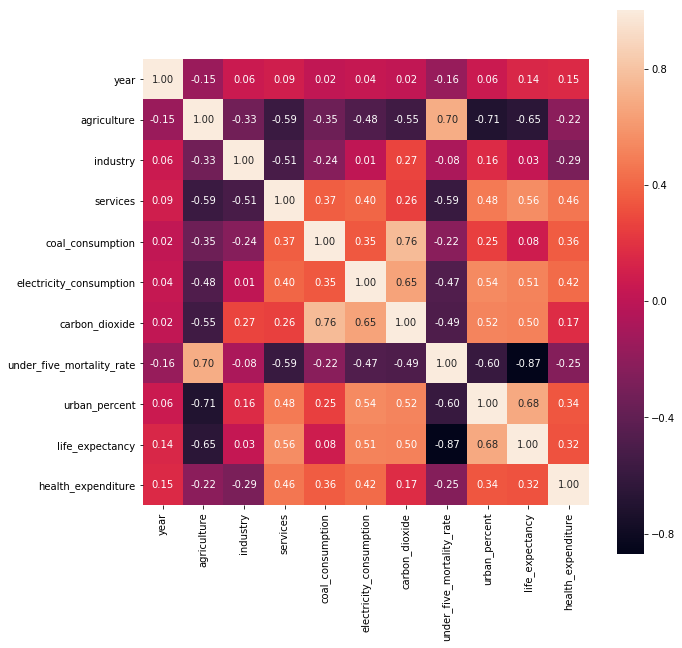

In [290]:
# Create heatmap with seaborn
plt.figure(figsize = (10, 10))
sns.heatmap(test.corr(), annot = True, fmt = ".2f", square = True)

plt.show()